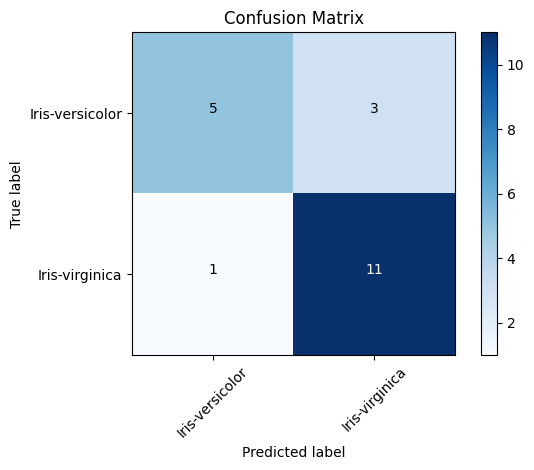

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class Perceptron():
    def __init__(self, eta=0.1, n_iter=50, batch_size=10, nameA='', nameB=''):
        self.eta = eta
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.nameA = nameA
        self.nameB = nameB

    def step_fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        for _ in range(self.n_iter):
            for i in range(0, X.shape[0], self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                errors, _ = self.loss(X_batch, y_batch)
                self.w_[1:] += self.eta * X_batch.T.dot(errors)
                self.w_[0] += self.eta * errors.sum()
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def loss(self, X, y):
        errors = y - self.predict(X)
        Loss = ((errors ** 2).sum()) ** 0.5
        return errors, Loss

# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

SPECIES_1 = {'name': "Iris-setosa", 's': 0, 'end': 50}  # 0:50 # small size
SPECIES_2 = {'name': "Iris-versicolor", 's': 50, 'end': 100}  # 50:100
SPECIES_3 = {'name': "Iris-virginica", 's': 100, 'end': 150}  # 100:150
spA, spB = SPECIES_2, SPECIES_3

# Prepare data
X = df.iloc[np.r_[spA['s']:spA['end'], spB['s']:spB['end']], [0, 2]].values
y = df.iloc[np.r_[spA['s']:spA['end'], spB['s']:spB['end']], 4].values
y = np.where(y == spB['name'], -1, 1)  # Discrete response

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
perceptron = Perceptron(eta=0.01, n_iter=1000, batch_size=10)
perceptron.step_fit(X_train, y_train)

# Prediction
y_pred = perceptron.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['Iris-versicolor', 'Iris-virginica']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Fill in confusion matrix with values
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.metrics import classification_report
import numpy as np

# Accuracy, precision, recall, f1-score
report = classification_report(y_test, y_pred, target_names = classes)
print(report)

                 precision    recall  f1-score   support

Iris-versicolor       0.83      0.62      0.71         8
 Iris-virginica       0.79      0.92      0.85        12

       accuracy                           0.80        20
      macro avg       0.81      0.77      0.78        20
   weighted avg       0.80      0.80      0.79        20

